# Fetching Dataset


In [10]:
from sklearn.datasets import fetch_openml

In [11]:
mnist = fetch_openml('mnist_784')

In [12]:
x, y = mnist['data'], mnist['target']

In [13]:
x.shape


(70000, 784)

In [14]:
y.shape

(70000,)

In [15]:
%matplotlib inline

In [16]:
import matplotlib
import matplotlib.pyplot as plt


In [20]:
import numpy as np

some_digit = x.iloc[36001]
some_digit_array = np.array(some_digit)  # Convert the Series to a NumPy array
some_digit_image = some_digit_array.reshape(28, 28)  # Reshape the array into a 28x28 matrix


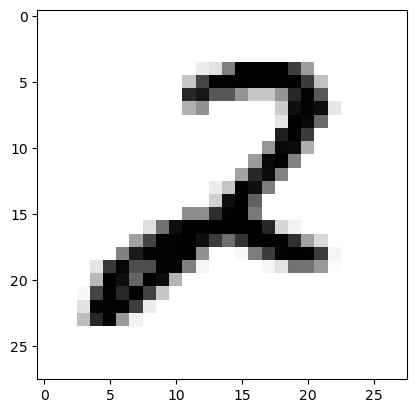

In [21]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
#plt.axis("off")

In [22]:
y[36001]

'2'

In [23]:
x_train, x_test = x[:60000], x[60000:]

In [24]:
y_train,y_test = y[:60000], y[60000:]

In [25]:
import numpy as np

shuffle_index = np.random.permutation(len(x_train))  # Generate shuffled indices

x_train_shuffled = x_train.iloc[shuffle_index]  # Shuffle the rows of x_train
y_train_shuffled = y_train.iloc[shuffle_index]  # Shuffle the corresponding labels


## Creating a 2 detector

In [26]:
y_train_2 = (y_train == '2')
y_test_2 = (y_test == '2')

In [27]:
y_test_2 #prpbality of occurance of 2 from dataset

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression(tol = 0.1)

In [30]:
clf.fit(x_train, y_train_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [31]:
clf.predict([some_digit])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [32]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train, y_train_2, cv = 3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [33]:
a.mean()

0.9781

## Evaluating Classifiers in Python: Precision, Recall & F1 Score 

In [34]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [35]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculating confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_train_2, y_train_pred)

array([[53566,   476],
       [  838,  5120]], dtype=int64)

In [40]:
confusion_matrix(y_train_2, y_train_2) # this is the confusion matrix for perfect prediction

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Presion and Recall

In [49]:
from sklearn.metrics import precision_score, recall_score

In [43]:
precision_score(y_train_2, y_train_pred)

0.9149392423159399

In [44]:
recall_score(y_train_2, y_train_pred)

0.8593487747566297

## F1- Score

In [45]:
from sklearn.metrics import f1_score


In [47]:
f1_score(y_train_2, y_train_pred)

0.8862731521550978

## Precision Recall Curve

In [50]:
from sklearn.metrics import precision_recall_curve

In [57]:
y_scores =  cross_val_predict(clf,x_train, y_train_2, cv = 3, method="decision_function")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [62]:
y_scores

array([-10.79425209,  -8.66111681,  -7.04486171, ..., -12.75771583,
        -8.0975212 , -10.657588  ])

In [64]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [65]:
precisions

array([0.10033006, 0.1003149 , 0.10031659, ..., 1.        , 1.        ,
       1.        ])

In [66]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [67]:
thresholds

array([-27.07409956, -27.05328014, -27.0336998 , ...,  18.3698964 ,
        18.59160332,  19.14827549])

## Plotting

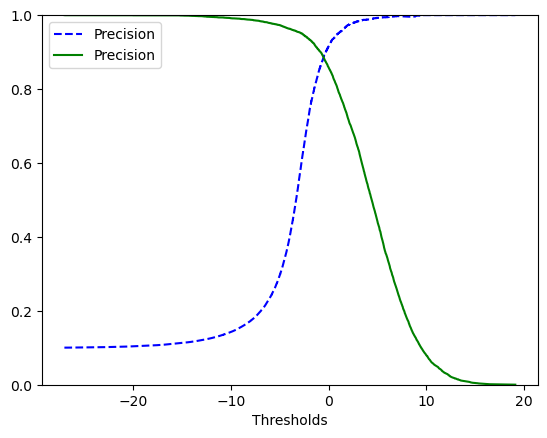

In [68]:
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g-", label = "Precision")
plt.xlabel("Thresholds")
plt.legend(loc = "upper left")
plt.ylim([0,1])
plt.show()